In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://drive.google.com/u/0/uc?id=1Fo_QyN4ttdz1muDHKgHtXVtZpXJ5ODoV&export=download')
df.head()

,date,txVolume,adjustedTxVolume,txCount,marketcap,price,exchangeVolume,generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue,medianFee,blockSize,blockCount
0,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,130171,49.980091,0.0005,21597536,177
1,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,112426,62.425891,0.0005,25676453,174
2,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,98258,26.942145,0.0005,27042465,149
3,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,96129,38.671980,0.0005,25727393,151
4,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,101721,35.382348,0.0005,26388234,134


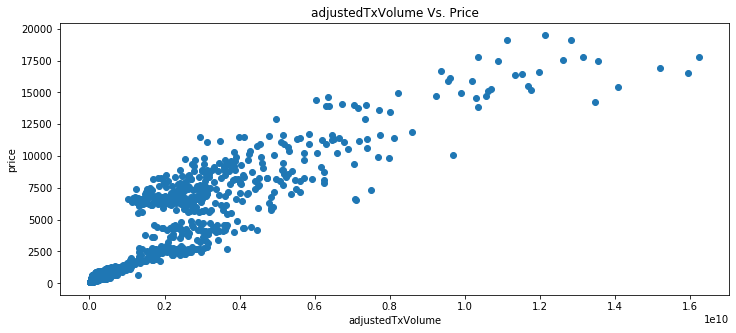

In [2]:
plt.figure(figsize = (12,5))
plt.title("adjustedTxVolume Vs. Price")
plt.xlabel("adjustedTxVolume")
plt.ylabel("price")
plt.plot(df["adjustedTxVolume"], df["price"], "o")
plt.savefig("adjustedTxVolume VS price.png")
plt.show()

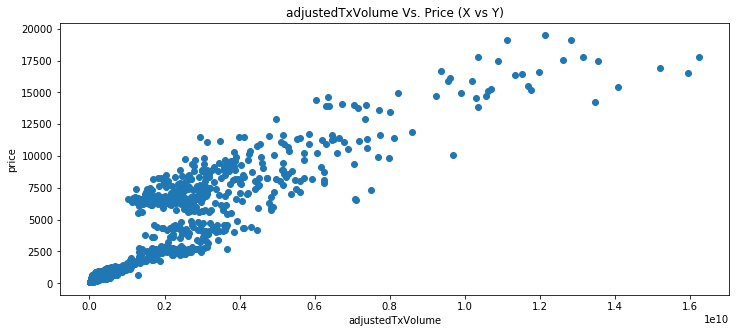

In [3]:
plt.figure(figsize = (12,5))
plt.title("adjustedTxVolume Vs. Price (X vs Y)")
plt.xlabel("adjustedTxVolume")
plt.ylabel("price")
plt.plot(df["adjustedTxVolume"], df["price"], "o")
plt.savefig("adjustedTxVolume VS price (X vs Y).png")
plt.show()

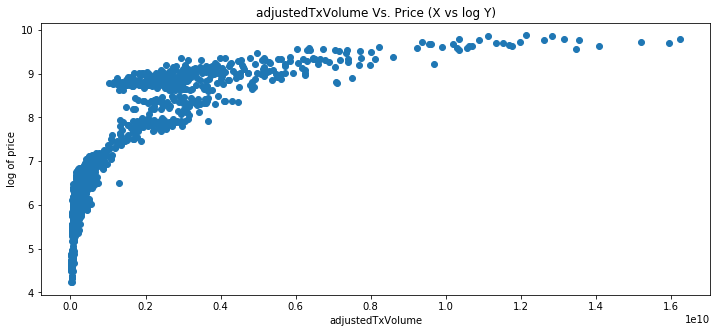

In [4]:
import numpy as np

plt.figure(figsize = (12,5))
plt.title("adjustedTxVolume Vs. Price (X vs log Y)")
plt.xlabel("adjustedTxVolume")
plt.ylabel("log of price")
plt.plot(df["adjustedTxVolume"], np.log(df["price"]), "o")
plt.savefig("adjustedTxVolume VS price (X vs log Y).png")
plt.show()

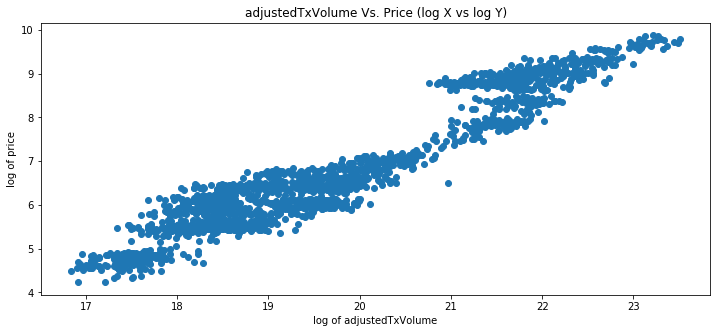

In [5]:
plt.figure(figsize = (12,5))
plt.title("adjustedTxVolume Vs. Price (log X vs log Y)")
plt.xlabel("log of adjustedTxVolume")
plt.ylabel("log of price")
plt.plot(np.log(df["adjustedTxVolume"]), np.log(df["price"]), "o")
plt.savefig("adjustedTxVolume VS price (log X vs log Y).png")
plt.show()

In [6]:
def calc_corr(a, b):
  a_std = np.std(a)
  a_mean = a.mean()
  a_final = (a - a_mean) / a_std

  b_std = np.std(b)
  b_mean = b.mean()
  b_final = (b - b_mean) / b_std

  r = (a_final * b_final).mean()
  return r

x = "adjustedTxVolume"
y = "price"

x_raw = df[x].copy()
y_raw = df[y].copy()

log_x = np.log(df[x]).copy()
log_y = np.log(df[y]).copy()

print(calc_corr(x_raw, y_raw))
print(calc_corr(x_raw, log_y))
print(calc_corr(log_x, log_y))

0.9142162621028266
0.7771601812065383
0.9520469542944037


In [7]:
log_x = np.log(df[x])
log_y = np.log(df[y])

x_std = np.std(log_x)
x_mean = log_x.mean()
log_x = (log_x - x_mean) / x_std

y_std = np.std(log_y)
y_mean = log_y.mean()
log_y = (log_y - y_mean) / y_std

w_norm = (log_x * log_y).mean()
b_norm = 0

print(w_norm)
print(b_norm)

0.9520469542944037
0


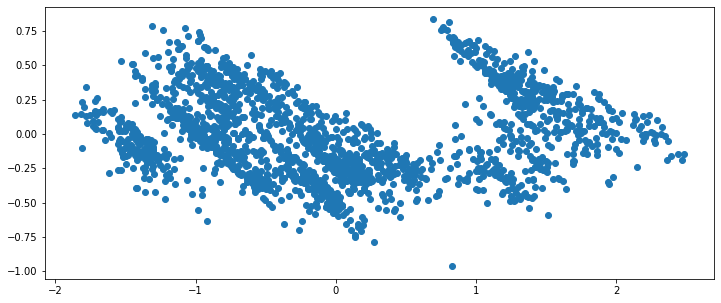

In [8]:
plt.figure(figsize = (12,5))
#plt.title("adjustedTxVolume Vs. Price Residual Plot")
#plt.xlabel("adjustedTxVolume")
#plt.ylabel("price")
plt.plot(log_x, log_y - (log_x * w_norm), "o")
plt.savefig("adjustedTxVolume VS price residual plot.png")
plt.show()

In [9]:
log_x = np.log(df[x])
log_y = np.log(df[y])

r = ((log_x * log_y).sum()) / (log_x.size)
w = r * (np.std(log_y)/np.std(log_x))
b = log_y - (w*log_x)
y_hat = w*df[x] + b

print(y_hat)

0       3.800716e+09
1       5.810843e+09
2       6.853469e+09
3       9.892807e+09
4       7.018509e+09
            ...     
2030    1.571605e+11
2031    3.157569e+11
2032    4.753922e+11
2033    2.675879e+11
2034    2.062605e+11
Length: 2035, dtype: float64
